# MALIGNANT COMMENTS CLASSIFICATION
1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

2. Data
All of the dataset values were provided by a client.

3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics

4. Features

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone.
Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.

In [187]:
# Importing Libraries..
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
# packages from gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# packages from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#packages from nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag

import warnings
warnings.filterwarnings('ignore')

In [188]:
# Loading the training data..
train=pd.read_csv('malignant_comments_train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [189]:
# Loading the test data..
test=pd.read_csv('malignant_comments_test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [190]:
# checking the features, records and target columns og train datdset
print('%d features and %d records.' % (train.shape[1], train.shape[0]))
print()
targets = list(train.columns[2:])
print('Target columns: ' + ', '.join(targets))

8 features and 159571 records.

Target columns: malignant, highly_malignant, rude, threat, abuse, loathe


In [191]:
# checking the features, records and target columns og train datdset
print('%d features and %d records.' % (test.shape[1], test.shape[0]))
print()
targets = list(test.columns[2:])
print('Target columns: ' + ', '.join(targets))

2 features and 153164 records.

Target columns: 


In [192]:
#finding null values in the database
print("Train Database null  values ")
print("    ")
print(train.isnull().sum())
print("    ")
print("Test Database null  values ")
print("    ")
print(test.isnull().sum())

Train Database null  values 
    
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
    
Test Database null  values 
    
id              0
comment_text    0
dtype: int64


In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [112]:
# Checking value counts for each feature..
features=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for i in features:
    print("Number of value_counts of {} : {}".format(i, train[i].nunique()))
    print(train[f'{i}'].value_counts())

Number of value_counts of malignant : 2
0    144277
1     15294
Name: malignant, dtype: int64
Number of value_counts of highly_malignant : 2
0    157976
1      1595
Name: highly_malignant, dtype: int64
Number of value_counts of rude : 2
0    151122
1      8449
Name: rude, dtype: int64
Number of value_counts of threat : 2
0    159093
1       478
Name: threat, dtype: int64
Number of value_counts of abuse : 2
0    151694
1      7877
Name: abuse, dtype: int64
Number of value_counts of loathe : 2
0    158166
1      1405
Name: loathe, dtype: int64


In [113]:
# Dropping features which are not giving any useful information
train.drop(['id'],axis=1,inplace=True)

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


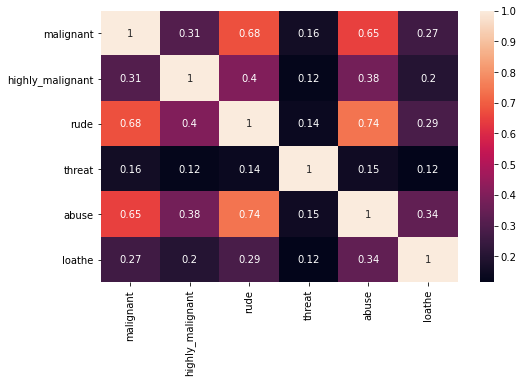

In [114]:
##  correlation chart
print(train.corr())
plt.figure(figsize=(8,5))
print(sns.heatmap(train.corr(),annot=True))

In [115]:
# Statistical chart
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


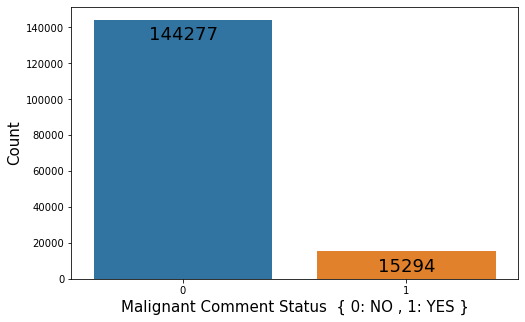

In [116]:
# countplot of  Malignant  comments Status . 
plt.figure(figsize=(8,5))
pd =sns.countplot(x = "malignant" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -15), 
                   textcoords = 'offset points')
plt.xlabel("Malignant Comment Status  { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

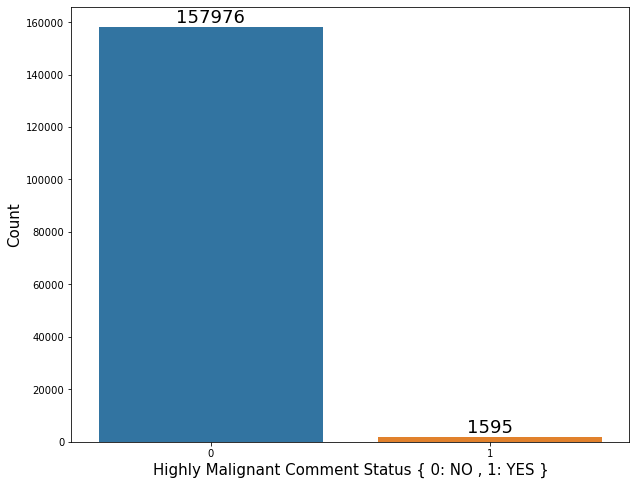

In [117]:
# countplot of Highly Malignant comments status . 
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "highly_malignant" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, +10), 
                   textcoords = 'offset points')
plt.xlabel("Highly Malignant Comment Status { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

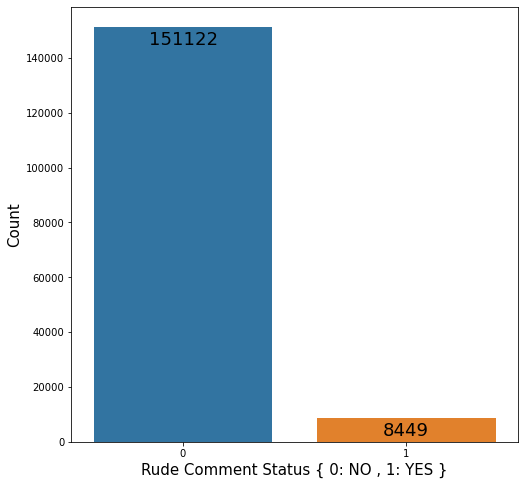

In [118]:
# countplot of Rude comment Status . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "rude" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Rude Comment Status { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

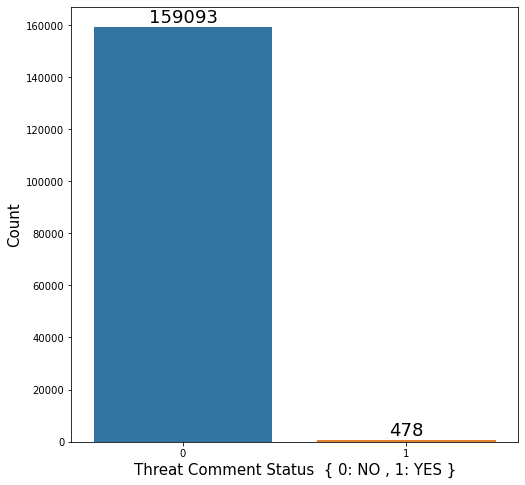

In [119]:
# countplot of Threat Comments Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "threat" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Threat Comment Status  { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

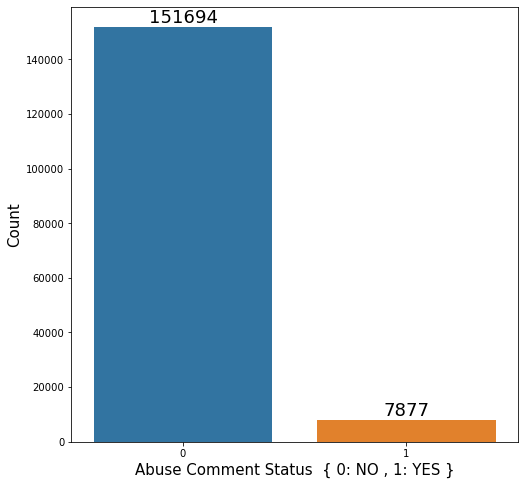

In [120]:
# countplot of  Abuse Comment Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "abuse" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("Abuse Comment Status  { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

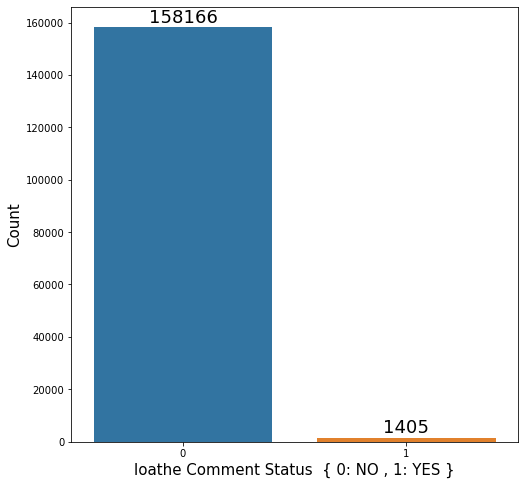

In [121]:
# countplot of loathe Comment Status  . 
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "loathe" ,  data=train)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("loathe Comment Status  { 0: NO , 1: YES }", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

In [122]:
# New feature (length) contains length of the  features
train['length']=train.comment_text.str.len()
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


# Data Cleaning

In [123]:
# Replace email address with 'email'
train['comment_text']=train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
train['comment_text']=train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
train['comment_text']=train['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
train['comment_text']=train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
train['comment_text']=train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove Punctuation 
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [160]:
# Replace email address with 'email'
test['comment_text']=test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#ReplaceURLs with 'webaddress'
test['comment_text']=test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbols with 'moneysymb'
test['comment_text']=test['comment_text'].str.replace(r'£|\$','dollars')

#Replace 10 digit phone number 
test['comment_text']=test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
                                                
#Replace numbers with 'numbr'
test['comment_text']=test['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove Punctuation 
test['comment_text']=test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replace Whitspace between terms with  a single space
test['comment_text']=test['comment_text'].str.replace(r'\s+',' ')

#Remove leading and trailing whitespace
test['comment_text']=test['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [124]:
#Removing Stopwords

import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [161]:
#Remove Stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') +['u','ur','4','2','im','dont','doin'])
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [125]:
# checking the clean comments content..
train["comment_text"]

0         Explanation Why edits made username Hardcore M...
1         D aww He matches background colour I seemingly...
2         Hey man I really trying edit war It guy consta...
3         More I make real suggestions improvement I won...
4                     You sir hero Any chance remember page
                                ...                        
159566    And second time asking view completely contrad...
159567    You ashamed That horrible thing put talk page ...
159568    Spitzer Umm theres actual article prostitution...
159569    And looks like actually put speedy first versi...
159570    And I really think understand I came idea bad ...
Name: comment_text, Length: 159571, dtype: object

In [126]:
# New feature (Clean_length) contains length of the clean_comment_text feature after puncuations, stopwords removal..
train['Clean_length'] = train.comment_text.str.len()
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,Clean_length
0,Explanation Why edits made username Hardcore M...,0,0,0,0,0,0,264,187
1,D aww He matches background colour I seemingly...,0,0,0,0,0,0,112,100
2,Hey man I really trying edit war It guy consta...,0,0,0,0,0,0,233,149
3,More I make real suggestions improvement I won...,0,0,0,0,0,0,622,398
4,You sir hero Any chance remember page,0,0,0,0,0,0,67,37


In [127]:
# New Column (clean_length) after puncuation ,stopwords removal

train['clean_length'] = train.comment_text.str.len()

#Total Length removal
print('Original Length' , train.length.sum())
print('Clean Length',  train.clean_length.sum() )

Original Length 62893130
Clean Length 42615013


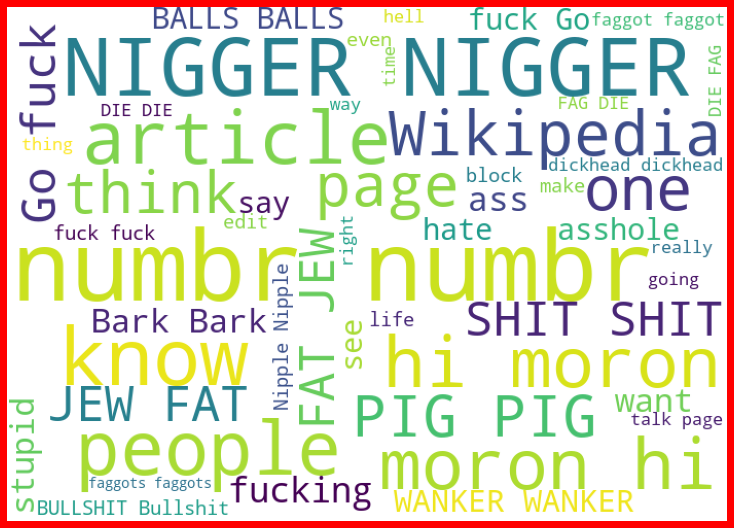

In [129]:
#getting sense of loud words in Comments which are  marked as Malignant

from wordcloud import WordCloud

sp = train['comment_text'][train['malignant']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

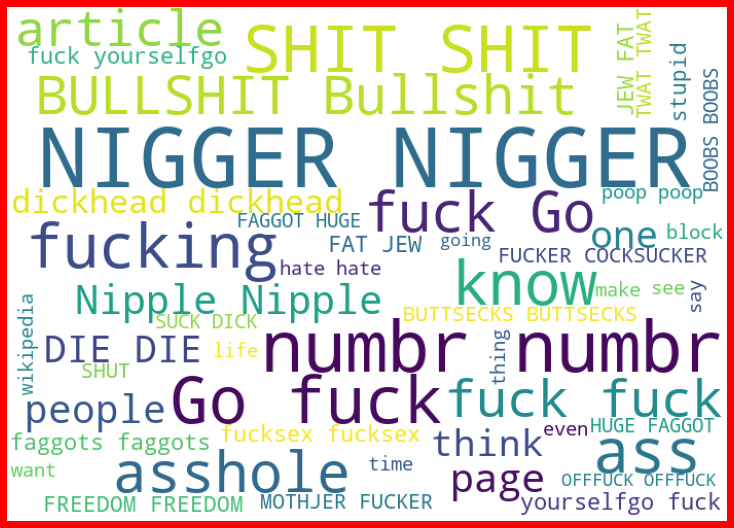

In [130]:
#getting sense of loud words in Comments which are marked as rude.

from wordcloud import WordCloud

sp = train['comment_text'][train['rude']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

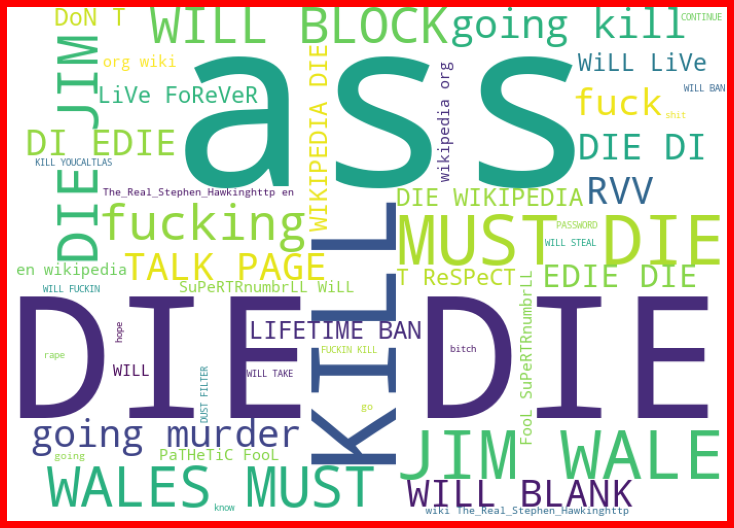

In [131]:
#getting sense of loud words in Comments which are marked as threat.

from wordcloud import WordCloud

sp = train['comment_text'][train['threat']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

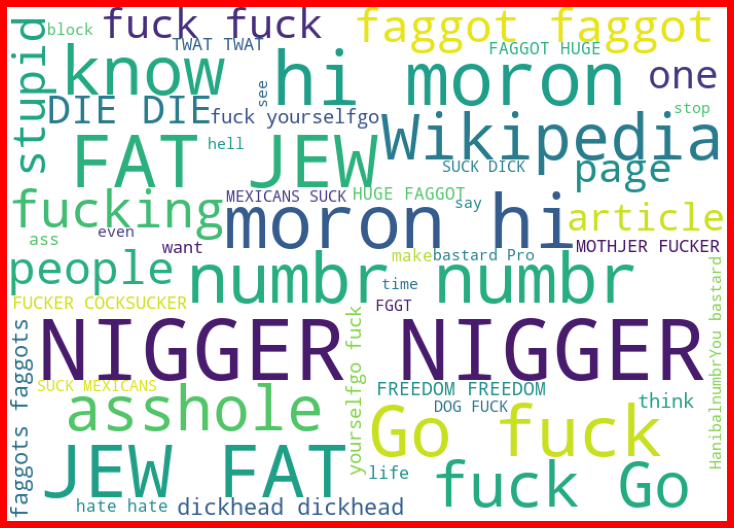

In [132]:
#getting sense of loud words in Comments which are marked as abuse.

from wordcloud import WordCloud

sp = train['comment_text'][train['abuse']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

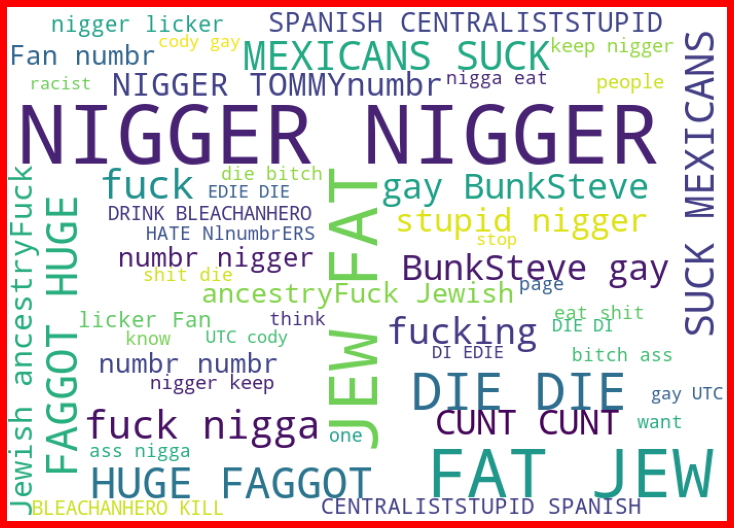

In [133]:
#getting sense of loud words in Comments which are marked as loathe.

from wordcloud import WordCloud

sp = train['comment_text'][train['loathe']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

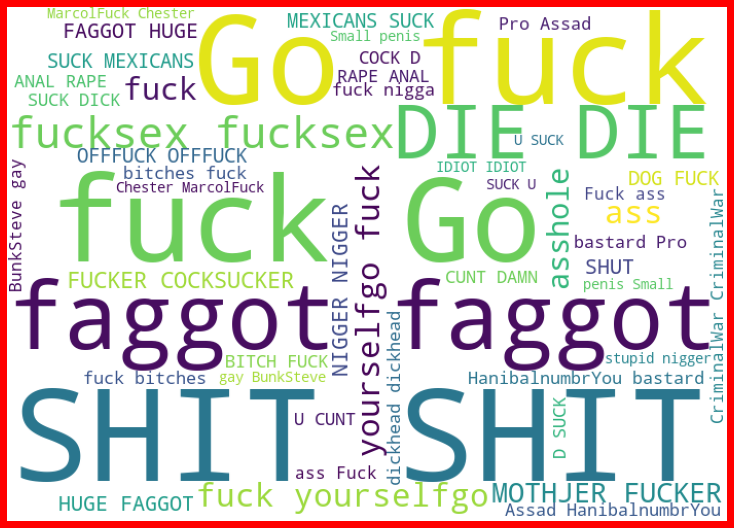

In [134]:
#getting sense of loud words in Comments which are marked as highly_malignant.

from wordcloud import WordCloud

sp = train['comment_text'][train['highly_malignant']==1]
sp_cloud =WordCloud(width=700, height = 500, background_color='white', max_words=50).generate(' '.join(sp))
plt.figure(figsize=(10,8),facecolor ='r')
plt.imshow(sp_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

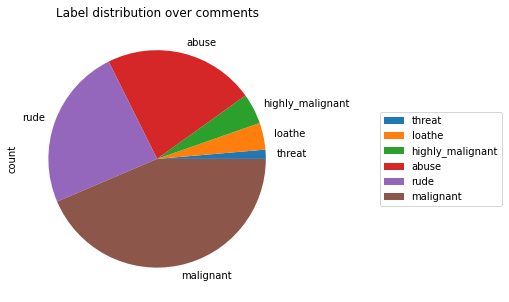

In [138]:
cols_target = ['malignant','threat','abuse','loathe','highly_malignant','rude',]
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(8, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [140]:
target_data = train[cols_target]

train['label'] =train[cols_target].sum(axis =1)
print(train['label'].value_counts())
train['label'] = train['label'] > 0 
train['label'] = train['label'].astype(int)
print(train['label'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64
0    143346
1     16225
Name: label, dtype: int64


In [148]:
#for counting frequently occurence of Malignant and not Malignant words.
import pandas as pd
count1 = Counter(" ".join(train[train['label']==0]["comment_text"]).split()).most_common(200)
count2 = Counter(" ".join(train[train['label']==1]["comment_text"]).split()).most_common(200)
df=pd.DataFrame()
print("TOP 200 Words in Each Category (Word,Counts)")
df['Malignant Words']=count1
df['Not Malignant Words']=count2
df.head(10)

TOP 200 Words in Each Category (Word,Counts)


,Malignant Words,Not Malignant Words
0,"(I, 203214)","(I, 21244)"
1,"(numbr, 147123)","(numbr, 9383)"
2,"(article, 54583)","(YOU, 8664)"
3,"(page, 42848)","(You, 6816)"
4,"(The, 41501)","(fuck, 4910)"
5,"(Wikipedia, 37384)","(FUCK, 3533)"
6,"(would, 27183)","(like, 3512)"
7,"(talk, 26643)","(A, 3064)"
8,"(one, 25181)","(NIGGER, 2428)"
9,"(If, 25102)","(SUCK, 2393)"


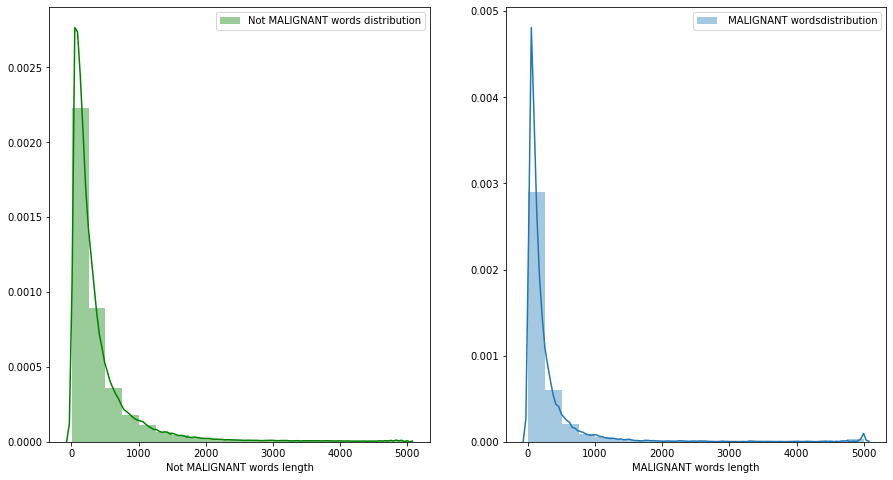

In [141]:
# Comments length distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==0]['length'],bins=20,ax=ax[0],label='Not MALIGNANT words distribution',color='g')

ax[0].set_xlabel('Not MALIGNANT words length')
ax[0].legend()

sns.distplot(train[train['label']==1]['length'],bins=20,ax=ax[1],label=' MALIGNANT wordsdistribution')
ax[1].set_xlabel('MALIGNANT words length')
ax[1].legend()

plt.show()

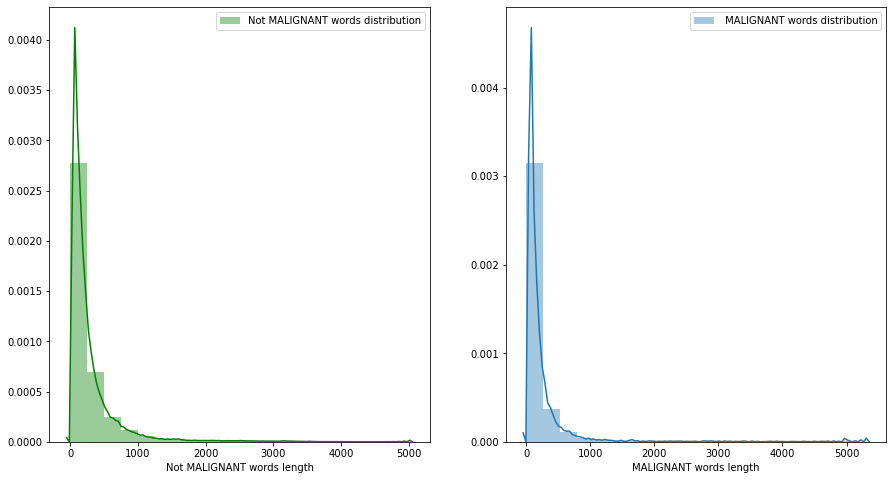

In [142]:
# Comments length distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==0]['Clean_length'],bins=20,ax=ax[0],label='Not MALIGNANT words distribution',color='g')

ax[0].set_xlabel('Not MALIGNANT words length')
ax[0].legend()

sns.distplot(train[train['label']==1]['Clean_length'],bins=20,ax=ax[1],label=' MALIGNANT words distribution')
ax[1].set_xlabel('MALIGNANT words length')
ax[1].legend()

plt.show()

# Convert Train Data into Vectors


In [143]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [144]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(train['comment_text'])

In [145]:
# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

# Assigning the label in y and checking it's shape
y = train['label'].values
print("Shape of y: ",y.shape)

Shape of x:  (159571, 51306)
Shape of y:  (159571,)


# Importing necessary libraries

In [151]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, recall_score, classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, cross_val_predict



In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 42 ,test_size=0.30)

In [156]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state



The model calculation for LogisticRegression() are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.9549214572192514
The CV Score is 0.955756372746665

[[42792  1945]
 [  213  2922]]

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     44737
           1       0.60      0.93      0.73      3135

    accuracy                           0.95     47872
   macro avg       0.80      0.94      0.85     47872
weighted avg       0.97      0.95      0.96     47872



F1 Score=  0.7303174206448388

Log loss :  1.5569901962988597

Precision Score=  0.6003698376823505

Recall Score=  0.9320574162679426

roc_auc_score 0.797708462615155


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for KNeighborsClassifier() are:
[0 0 0 ... 1 0 0]
Accuracy Score=  0.8434366644385026
The CV Score is 0.8615224031850207

[[39173  3663]
 [ 3832  1204]]

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     42

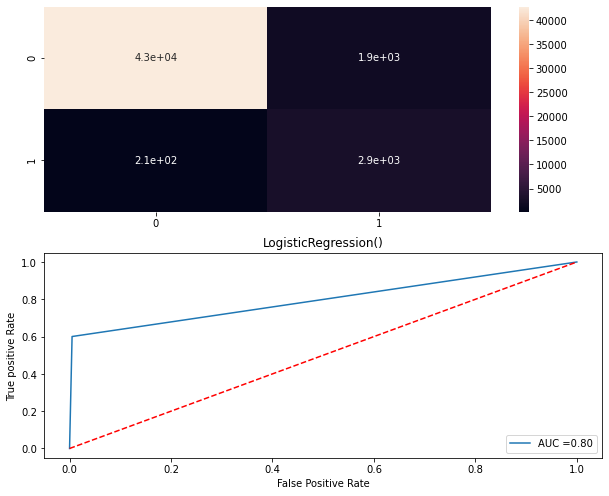

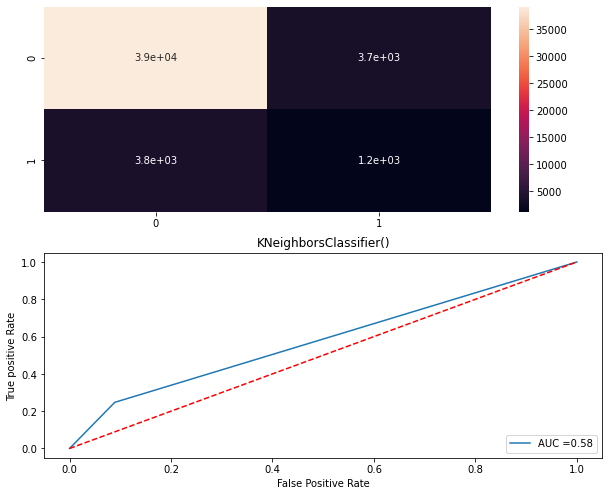

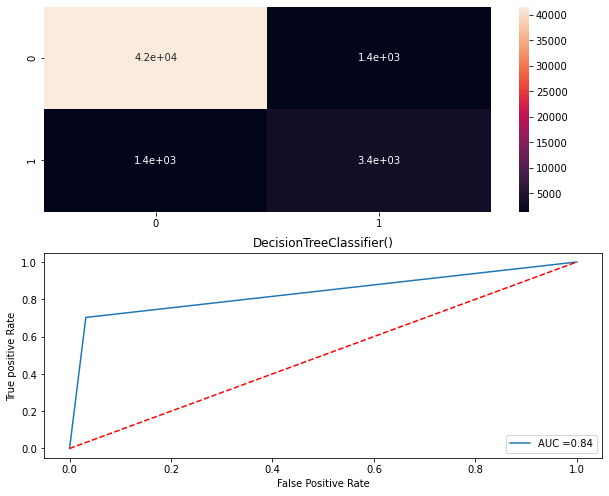

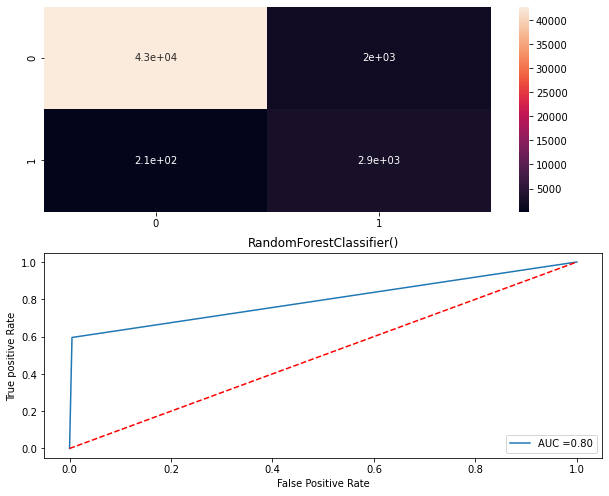

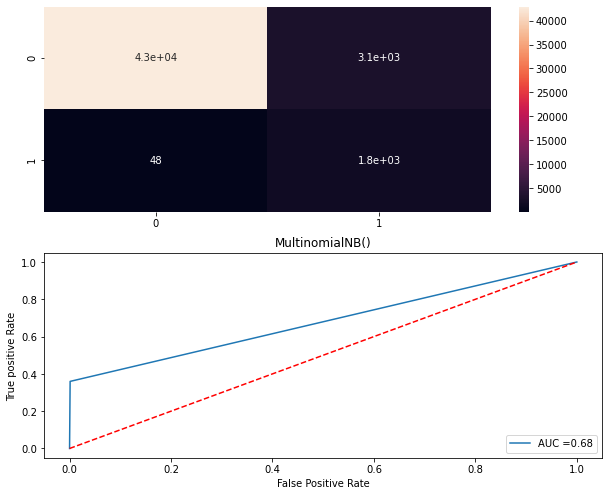

In [157]:
model=[]
score=[]
cvs=[]
rocscore=[]
F1score=[]
Precisionscore=[]
Recallscore=[]
lg_loss=[]

for i in [LogisticRegression(),
          KNeighborsClassifier() ,
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          MultinomialNB()]:
          
    
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(x_train,y_train)
        k.score(x_train,y_train)
        predict =k.predict(x_test)
        print(predict)
        #-----------Acurracy Score ------------------------------------
        AS=accuracy_score(predict,y_test)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        #-------------Finding Cross Value Score------------------------
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        #---------------------Confusion Matrix-------------------------
        cm=confusion_matrix(predict,y_test)
        print(cm)
        print("")
        print(classification_report(predict,y_test))
        print("\n")
        #-----------------F1 Score------------------------------------
        F1=f1_score(predict,y_test)
        print("F1 Score= " ,F1)
        F1score.append(F1)
        print("")
        #-----------------Log loss------------------------------------
        loss = log_loss(predict,y_test)
        print('Log loss : ', loss)
        lg_loss.append(loss)
        print("")
        #---------------Precision Score-------------------------------
        precision=precision_score(predict,y_test)
        print("Precision Score= " ,precision)
        Precisionscore.append(precision)
        print("")
        #-----------Recall Score ------------------------------------
        rec=recall_score(predict,y_test)
        print("Recall Score= " ,rec)
        Recallscore.append(rec)
        print("")
        #---------------Roc Auc Score
        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

In [158]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','MultinomialNB'],'Accuracy_Score':score,'Cross_val_score':cvs,'Log_loss':lg_loss,'Roc_auc_curve':rocscore,'F1_Score':F1score,'Precison_Score':Precisionscore,'Recall_Score':Recallscore})
result

,Model,Accuracy_Score,Cross_val_score,Log_loss,Roc_auc_curve,F1_Score,Precison_Score,Recall_Score
0,LogisticRegression,0.954921,0.955756,1.556990,0.797708,0.730317,0.600370,0.932057
1,KNeighborsClassifier,0.843437,0.861522,5.407567,0.579137,0.243159,0.247380,0.239079
2,DecisionTreeClassifier,0.940947,0.941174,2.039653,0.835301,0.707562,0.702692,0.712500
3,RandomForestClassifier,0.954545,0.954635,1.569977,0.795222,0.726976,0.595233,0.933613
4,MultinomialNB,0.933907,0.936223,2.282820,0.679327,0.525353,0.359770,0.973319


# From the above analysis w.r.t Accuracy score, Cross value score and F1 score Random Forest Classifier is performing best

In [159]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predict=rfc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(rfc,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)
loss = log_loss(predict,y_test)
print("Log loss is", loss)
cm=confusion_matrix(predict,y_test)
print("Confusion matrix ", cm)

Accuracy Score= 0.9552556818181818
The CV Score is 0.9545719497932772
Log loss is 1.5454460032289223
Confusion matrix  [[42779  1916]
 [  226  2951]]


# Converting Test Data into Vectors


In [164]:
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features= 51306,smooth_idf=False)
    return tfid.fit_transform(text)

In [165]:
tf_vec= TfidfVectorizer(max_features = 51306  ,stop_words = 'english')
features1 =tf_vec.fit_transform(test['comment_text'])

In [168]:

prediction=rfc.predict(features1)
prediction

array([0, 0, 0, ..., 1, 0, 0])

# Saving Prediction in csv file

In [184]:
df1=pd.DataFrame(prediction)
df1.to_csv("Malignant_Comment_Classifier_Predict.csv")

In [185]:
# Dumping Data in pickle file.
import joblib
joblib.dump(rfc,'Malignant_Comment_Classifier_Predict.pkl')

['Malignant_Comment_Classifier_Predict.pkl']